In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
# 데이터 로드 및 확인
df = pd.read_csv("C:/Users/rudal/OneDrive/Ai/Seed_data.csv", header=0)
df


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [3]:
df.isnull().sum()


A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [4]:
# 특성과 타겟 분리
X = df.drop('target', axis=1)  # 특성
y = df['target']               # 타겟

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 스케일링된 데이터로 데이터프레임 생성
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [5]:
y = pd.get_dummies(y).values
X = X.values
X
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)


In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((157, 7), (53, 7), (157, 3), (53, 3))

In [8]:
# 모델 구축 함수
def build_model_with_dropout(input_shape, num_classes):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # 수정된 부분

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # 수정된 부분
    return model

# 모델 훈련 함수
def train_model(model, train_data, train_labels, test_data, test_labels):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(train_data,
                        train_labels,
                        epochs=100,  # 최대 에포크 수를 크게 설정합니다.
                        batch_size=512,
                        validation_data=(test_data, test_labels),
                        callbacks=[early_stopping],  # 조기 종료 콜백 추가
                        verbose=2)
    return history

In [9]:
# 손실값 그래프 함수
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [10]:
# 모델 평가 함수
def evaluate_model(model, test_data, test_labels):
    results = model.evaluate(test_data, test_labels, verbose=2)
    print(f"Test Loss: {results[0]}")
    print(f"Test Accuracy: {results[1]}")

In [11]:
# 모델로 예측 수행
def make_predictions(model, test_data):
    predictions = model.predict(test_data)
    return np.argmax(predictions, axis=1)

In [12]:
# 평가 결과 시각화 함수
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [14]:
input_shape = (X_train.shape[1],)
num_classes = y_train.shape[1]  # 수정된 부분
model_with_dropout = build_model_with_dropout(input_shape, num_classes)

In [15]:
history_with_dropout = train_model(model_with_dropout, X_train, y_train, X_test, y_test)

Epoch 1/100
1/1 - 1s - loss: 5.6794 - accuracy: 0.3503 - val_loss: 2.2171 - val_accuracy: 0.4906 - 774ms/epoch - 774ms/step
Epoch 2/100
1/1 - 0s - loss: 6.1767 - accuracy: 0.3694 - val_loss: 2.1758 - val_accuracy: 0.4906 - 27ms/epoch - 27ms/step
Epoch 3/100
1/1 - 0s - loss: 5.2414 - accuracy: 0.3248 - val_loss: 2.1355 - val_accuracy: 0.4151 - 27ms/epoch - 27ms/step
Epoch 4/100
1/1 - 0s - loss: 5.7333 - accuracy: 0.3312 - val_loss: 2.0988 - val_accuracy: 0.3585 - 28ms/epoch - 28ms/step
Epoch 5/100
1/1 - 0s - loss: 5.4588 - accuracy: 0.2803 - val_loss: 2.0652 - val_accuracy: 0.3019 - 29ms/epoch - 29ms/step
Epoch 6/100
1/1 - 0s - loss: 4.6727 - accuracy: 0.3248 - val_loss: 2.0312 - val_accuracy: 0.3019 - 29ms/epoch - 29ms/step
Epoch 7/100
1/1 - 0s - loss: 5.6814 - accuracy: 0.3439 - val_loss: 1.9997 - val_accuracy: 0.2830 - 29ms/epoch - 29ms/step
Epoch 8/100
1/1 - 0s - loss: 4.8052 - accuracy: 0.3885 - val_loss: 1.9696 - val_accuracy: 0.2830 - 27ms/epoch - 27ms/step
Epoch 9/100
1/1 - 0s -

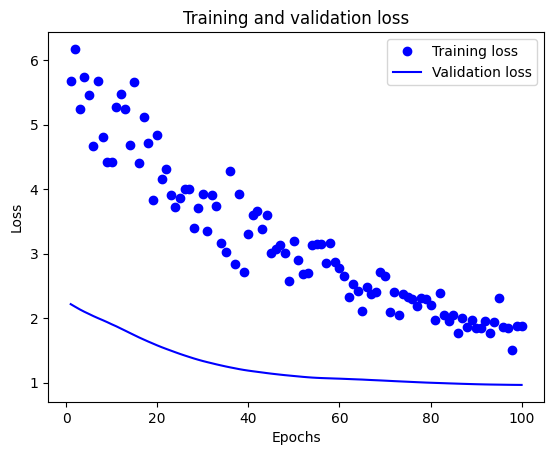

In [16]:
# 손실값 그래프 출력
plot_loss(history_with_dropout)

In [17]:
# 모델 평가
evaluate_model(model_with_dropout, X_test, y_test)


2/2 - 0s - loss: 0.9639 - accuracy: 0.4717 - 22ms/epoch - 11ms/step
Test Loss: 0.963877260684967
Test Accuracy: 0.4716981053352356


In [18]:
# 예측 수행
predictions = make_predictions(model_with_dropout, X_test)


2/2 [==============================] - 0s 2ms/step


In [19]:
# 실제 타겟 클래스와 예측된 클래스 비교
true_classes = np.argmax(y_test, axis=1)

In [20]:
# 정확도 계산 및 출력
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_classes, predictions)
print(f"Prediction Accuracy: {accuracy}")

Prediction Accuracy: 0.4716981132075472


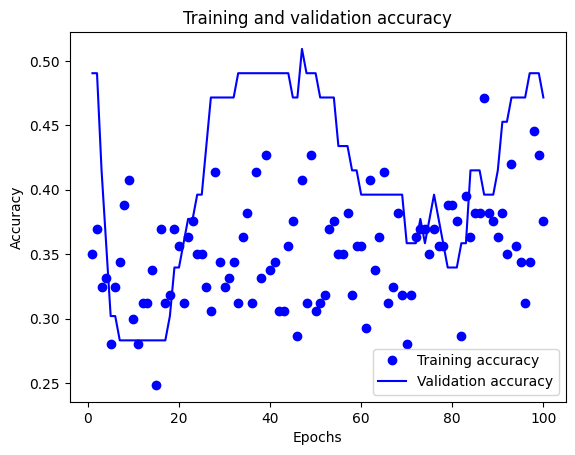

In [21]:
# 평가 결과 시각화
plot_accuracy(history_with_dropout)